> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [59]:
What census data is
most associated with
high gun per capita?
Which states have had
the highest growth in
gun registrations?
What is the overall
trend of gun
purchases?

SyntaxError: invalid syntax (<ipython-input-59-dcfd07ac1e50>, line 1)

In [60]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [61]:
# Load your data and print out a few lines. Perform operations to inspect data
fire=pd.read_csv('/Users/amit/Desktop/udacity/nics-firearm-background-checks/data/nics-firearm-background-checks.csv')
#   types and look for instances of missing or possibly errant data.
dg=pd.read_csv('/Users/amit/Desktop/udacity/project02/Census Data PoP_UDACITY.csv')


In [62]:
## Selecting only the month of july from the gun dataset

In [63]:
fire.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-03,Alabama,31205.0,606.0,34897.0,17850.0,1583.0,1744,0.0,36.0,...,0.0,0.0,0.0,42.0,23.0,8.0,2.0,2.0,0.0,92652
1,2020-03,Alaska,143.0,4.0,4657.0,3819.0,487.0,386,0.0,0.0,...,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,9939
2,2020-03,Arizona,5685.0,958.0,46377.0,19346.0,2433.0,4846,0.0,18.0,...,2.0,0.0,0.0,21.0,11.0,5.0,0.0,0.0,0.0,82771
3,2020-03,Arkansas,2424.0,673.0,15304.0,8968.0,600.0,885,4.0,27.0,...,0.0,0.0,0.0,11.0,10.0,3.0,1.0,0.0,2.0,31651
4,2020-03,California,27792.0,0.0,81543.0,48616.0,5041.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164497


In [64]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14135 entries, 0 to 14134
Data columns (total 27 columns):
month                        14135 non-null object
state                        14135 non-null object
permit                       14111 non-null float64
permit_recheck               2750 non-null float64
handgun                      14115 non-null float64
long_gun                     14116 non-null float64
other                        7150 non-null float64
multiple                     14135 non-null int64
admin                        14112 non-null float64
prepawn_handgun              12192 non-null float64
prepawn_long_gun             12190 non-null float64
prepawn_other                6765 non-null float64
redemption_handgun           12195 non-null float64
redemption_long_gun          12194 non-null float64
redemption_other             6765 non-null float64
returned_handgun             3850 non-null float64
returned_long_gun            3795 non-null float64
returned_other   

In [65]:
dg.head()

,State,Population,Year
0,Alabama,4318608,7/1/99
1,Alabama,4452173,7/1/00
2,Alabama,4467634,7/1/01
3,Alabama,4480089,7/1/02
4,Alabama,4503491,7/1/03


##### As we can see the fire dataset has monthly statewise data points and we
##### are going to filter only 7th month from it in order to merge the dg which 
##### is demographic dataset.

In [66]:
# Changing the date from object to datetime format
fire['month']=pd.to_datetime(fire['month'])

In [67]:
# Renaming the dataset to df
df = fire[fire['month'].dt.month == 7]

In [68]:
# Changing the date from object to datetime format
dg['Year']=pd.to_datetime(dg['Year'])

In [69]:
df=df.rename(columns={'state':'State','month':'Year'})

In [70]:
# We are going to merge the fire and demographic data 
gda=pd.merge(df,dg,on=['State','Year'])

In [71]:
gda.head()

,Year,State,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Population
0,2019-07-01,Alabama,33116.0,865.0,8711.0,5851.0,410.0,353,0.0,19.0,...,0.0,0.0,20.0,9.0,4.0,0.0,1.0,0.0,51757,4903185
1,2019-07-01,Alaska,167.0,24.0,2172.0,2139.0,247.0,151,0.0,0.0,...,0.0,0.0,11.0,15.0,2.0,1.0,0.0,0.0,5298,731545
2,2019-07-01,Arizona,5181.0,489.0,11005.0,5995.0,1203.0,651,0.0,18.0,...,0.0,0.0,13.0,12.0,5.0,0.0,0.0,0.0,26325,7278717
3,2019-07-01,Arkansas,2687.0,645.0,4049.0,3487.0,289.0,305,5.0,8.0,...,0.0,0.0,5.0,8.0,1.0,0.0,0.0,0.0,13684,3017804
4,2019-07-01,California,27930.0,0.0,30400.0,20830.0,3485.0,0,6259.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89532,39512223


## Data manipulation goals
> * Add a column for guns per capita
> * Add a row for sum of all states for each year
> * Divide states in three categories moderate left and right
> * Find gun violence data for 1999 to 2019 for individual states

In [72]:
gda['gunspercapita']=gda['totals']/gda['Population']

In [92]:
# Top 15 highest guns sold 
gda.nlargest(15,'totals')

,Year,State,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Population,gunspercapita
13,2019-07-01,Illinois,10764.0,405293.0,15782.0,6889.0,0.0,730,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439458,12671821,0.034680
68,2018-07-01,Kentucky,379409.0,0.0,6306.0,4537.0,295.0,341,2.0,17.0,...,0.0,18.0,24.0,1.0,2.0,0.0,0.0,393583,4461153,0.088225
119,2017-07-01,Kentucky,374603.0,0.0,7236.0,5118.0,241.0,419,0.0,9.0,...,0.0,26.0,25.0,1.0,0.0,0.0,1.0,390494,4452268,0.087707
170,2016-07-01,Kentucky,342858.0,0.0,9378.0,6615.0,321.0,534,0.0,7.0,...,NaN,13.0,8.0,2.0,0.0,0.0,0.0,363085,4438182,0.081809
17,2019-07-01,Kentucky,1627.0,301200.0,8059.0,4658.0,370.0,451,0.0,34.0,...,0.0,21.0,7.0,0.0,0.0,1.0,0.0,319270,4467673,0.071462
272,2014-07-01,Kentucky,232847.0,NaN,6375.0,5428.0,151.0,484,0.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,248979,4414349,0.056402
221,2015-07-01,Kentucky,201788.0,NaN,8223.0,5645.0,238.0,467,0.0,7.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,220018,4425976,0.049711
476,2010-07-01,Kentucky,204102.0,NaN,5885.0,5426.0,93.0,398,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219640,4348181,0.050513
374,2012-07-01,Kentucky,191827.0,NaN,7523.0,6566.0,128.0,500,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209830,4386346,0.047837
64,2018-07-01,Illinois,13684.0,160026.0,16840.0,7743.0,0.0,678,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198971,12723071,0.015639


In [102]:
alabama=gda[gda['State']=="Alabama"]

In [109]:
y19=gda[gda['Year']=="2019-07-01"]

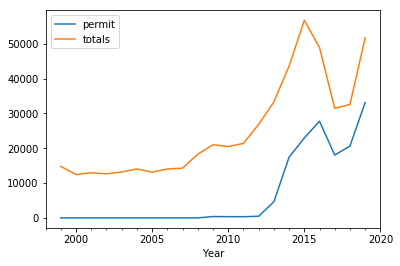

In [114]:
alabama.plot(x='Year',y=['permit','totals'])

In [85]:
sorted = gda.sort_values(by=['totals'],ascending=False)

(<matplotlib.axes._subplots.AxesSubplot at 0x11d6cbc18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127688a90>)

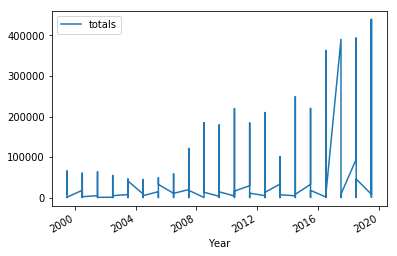

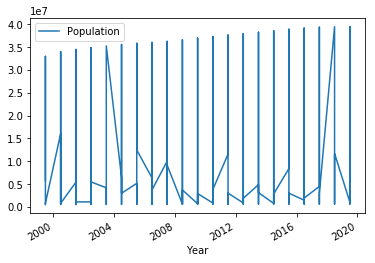

In [91]:
sorted.plot(x='Year',y=[ 'totals']), sorted.plot(x='Year',y=[ 'Population'])

(<matplotlib.axes._subplots.AxesSubplot at 0x1218fb2e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x121a98c50>)

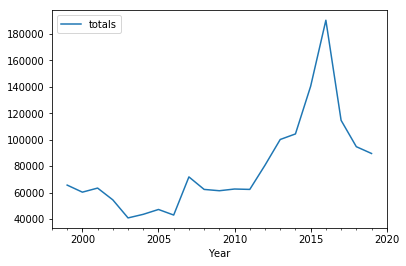

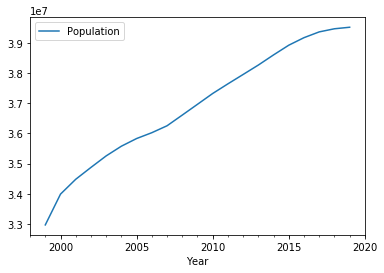

In [538]:
California.plot(x='Year',y=[ 'totals']), California.plot(x='Year',y=[ 'Population'])

In [513]:
alabama['Population']

0       4903185
51      4887681
102     4874486
153     4863525
204     4852347
255     4841799
306     4830081
357     4815588
408     4799069
459     4785437
510     4757938
561     4718206
612     4672840
663     4628981
714     4569805
765     4530729
816     4503491
867     4480089
918     4467634
969     4452173
1020    4318608
Name: Population, dtype: int64

(<matplotlib.axes._subplots.AxesSubplot at 0x119ef68d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f78d550>)

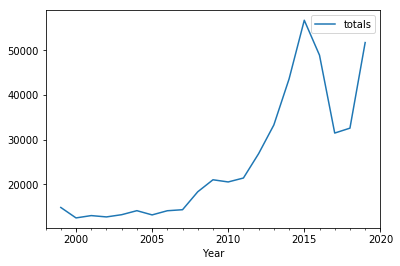

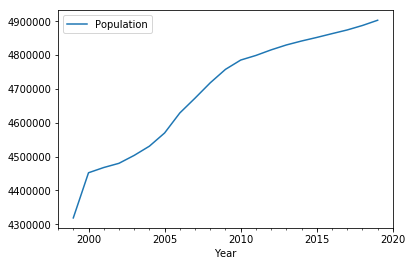

In [517]:
alabama.plot(x='Year',y=[ 'totals']), alabama.plot(x='Year',y=[ 'Population'])

In [391]:
fire['month']

KeyError: 'month'

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

In [69]:
#ate.plot(x='month',y=['permit', 'totals'])
secay = ax.secondary_xaxis('top', y='permit_recheck')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'secondary_xaxis'

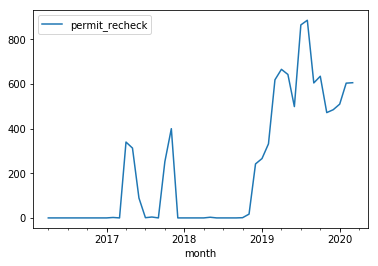

In [58]:
ate.plot(x='month',y='permit_recheck')


In [88]:
df.head()
alabama=df[df['state']=='Alabama']

alabama['month']=pd.to_datetime(alabama['month'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
alabama[]

In [86]:
alabama

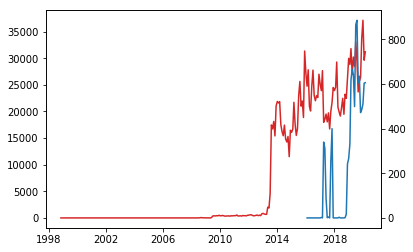

In [93]:
t=alabama['month']
d1=alabama['permit']
d2=alabama['permit_recheck']
fig,ax1=plt.subplots()
ax1.plot(t,d1,'tab:red')
ax2=ax1.twinx()
ax2.plot(t,d2)
plt.show()


TypeError: argument of type 'AxesSubplot' is not iterable

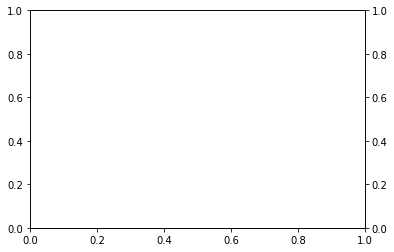

In [80]:
#alabama.plot(x='month',y=['permit', 'totals'])


In [38]:
alabama.plot(x='month',y=['permit', 'permit_recheck','totals'])

ValueError: Item wrong length 1 instead of 257.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!